In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = {'panorama': ['soleado', 'soleado', 'nublado', 'lluvioso', 'lluvioso', 'lluvioso', 'nublado',
                     'soleado','soleado','lluvioso','soleado','nublado','nublado','lluvioso'], 
        'temperatura': ['alta', 'alta', 'alta', 'media', 'fria','fria','fria','media','fria','media',
                       'media','media','alta','media'],
        'humedad': ['alta', 'alta', 'alta', 'alta', 'normal','normal','normal','alta','normal',
                    'normal','normal','alta','normal','alta'],
       'viento':['debil','fuerte','debil','debil','debil','fuerte','debil','debil','debil','fuerte',
                'fuerte','fuerte','debil','fuerte'],
       'jugar tennis':['no','no','si','si','si','no','si','no','si','si','si','si','si','no']}

In [3]:
data = pd.DataFrame(data)
data = data.rename_axis("dias")
data

,panorama,temperatura,humedad,viento,jugar tennis
dias,,,,,
0,soleado,alta,alta,debil,no
1,soleado,alta,alta,fuerte,no
2,nublado,alta,alta,debil,si
3,lluvioso,media,alta,debil,si
4,lluvioso,fria,normal,debil,si
5,lluvioso,fria,normal,fuerte,no
6,nublado,fria,normal,debil,si
7,soleado,media,alta,debil,no
8,soleado,fria,normal,debil,si


In [4]:
# jugar tenis representará las etiquetas de salida (variable de respuesta, hojas)
# panorama, temperatura, humedad, y viento representarán las características de entrada (features)

# Índice Gini (D)

El índice Gini se utiliza para decidir la división óptima de un **nodo raíz** y las divisiones posteriores (**Nodos interno**). En otras palabras, es la forma más popular y fácil de dividir un árbol de decisión y solo funciona con objetivos categóricos, ya que solo hace divisiones binarias. Este índice lo podemos dividir para las clases (1), hojas (2) y características (3).

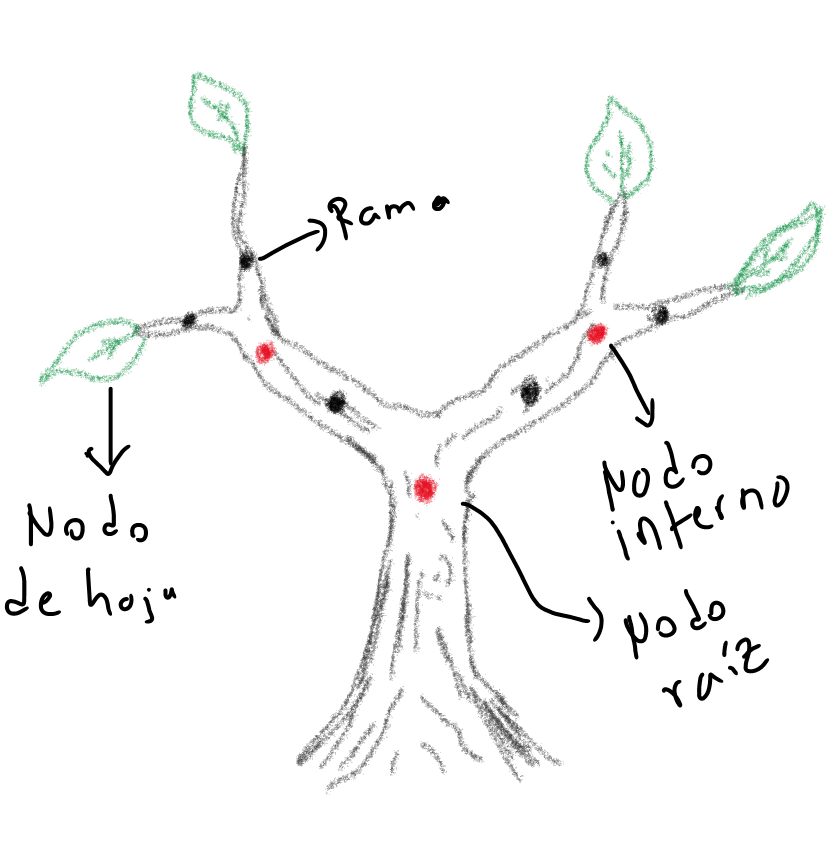

Ginni para clases:
$
Gini(D)= 1 - \sum_{C=1}^{C} P_{c}^{2} \tag{1}
$

Donde $D$ es un conjunto de datos con $C$ clases.

Ahora imaginemos un conjunto de datos con dos divisiones ($S$) y dos subconjuntos de datos $D1$ y $D2$. La división de cada subconjunto de acuerdo a las condiciones de la variable de respuesta dan el Ginni para cada hoja.

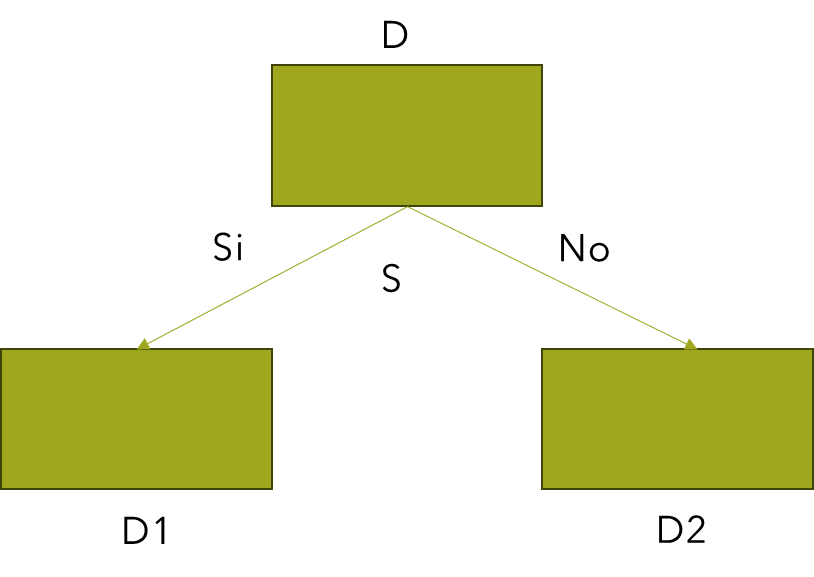

El índice Gini quedaría definido como:

Ginni para hojas:
$
Gini(Di) = 1 - (p^2) + (q^2) \tag{2}
$

Ahora, el Ginni de cada característica queda definido como:
$Gini(D) = \frac{D1}{D}*Gini(D1) + \frac{D2}{D}*Gini(D2) \tag{3}
$

Donde $Gini(D1)$ y $Gini(D2)$ representan los índices Gini de las hojas. Estos últimos se estiman:

Donde $p$ y $q$ (en este caso) serían las probabilidades de "Si" y "No" para cada subconjunto de datos.

## Gini(Jugar tennis|Viento)

### Gini(Jugar tennis|Viento=Fuerte)

In [5]:
VientoFuerte=data.loc[data["viento"]== "fuerte", ["jugar tennis"]]
VientoFuerte

,jugar tennis
dias,
1,no
5,no
9,si
10,si
11,si
13,no


### Gini(Jugar tennis = Si|Viento=Fuerte)

In [6]:
VientoFuerte[VientoFuerte["jugar tennis"]=="si"]

,jugar tennis
dias,
9,si
10,si
11,si


### Gini(Jugar tennis = No|Viento=Fuerte)

In [7]:
VientoFuerte[VientoFuerte["jugar tennis"]=="no"]

,jugar tennis
dias,
1,no
5,no
13,no


In [8]:
#Número de veces en que no y si se juega tennis con el viento fuerte
SiNo, VientoFuerteVeces = np.unique(VientoFuerte,return_counts=True)
VientoFuerteVeces

array([3, 3], dtype=int64)

In [9]:
SiNo

array(['no', 'si'], dtype=object)

In [10]:
VientoFuerteVeces.sum()

6

$
Gini(Jugar tennis = Fuerte|Viento) = 1-(p_{si}^2)+(q_{no}^2)
$

$
Gini(Jugar tennis = Fuerte|Viento) = 1-\left( \frac{Si}{Total} \right)^{2} + \left( \frac{No}{Total} \right)^{2}
$

$
Gini(Jugar tennis = Fuerte|Viento) = 1-\left( \frac{3}{6} \right)^{2} + \left( \frac{3}{6} \right)^{2} = 0.5
$

In [11]:
1 - ((VientoFuerteVeces[0]/VientoFuerteVeces.sum())**2 + (VientoFuerteVeces[1]/VientoFuerteVeces.sum())**2)

0.5

### Gini(Jugar tennis |Viento=Debil)

In [12]:
VientoDebil= data.loc[data["viento"]== "debil", ["jugar tennis"]]
VientoDebil

,jugar tennis
dias,
0,no
2,si
3,si
4,si
6,si
7,no
8,si
12,si


### Gini(Jugar tennis = Si |Viento=Debil)

In [13]:
VientoDebil[VientoDebil["jugar tennis"]=="si"]

,jugar tennis
dias,
2,si
3,si
4,si
6,si
8,si
12,si


### Gini(Jugar tennis=No|Viento=Debil)

In [14]:
VientoDebil[VientoDebil["jugar tennis"]=="no"]

,jugar tennis
dias,
0,no
7,no


In [15]:
#Número de veces en que no y si se juega tennis con el viento fuerte
yn, VientoDebilVeces = np.unique(VientoDebil,return_counts=True)
VientoDebilVeces

array([2, 6], dtype=int64)

In [16]:
1 - ((VientoDebilVeces[0]/VientoDebilVeces.sum())**2 + (VientoDebilVeces[1]/VientoDebilVeces.sum())**2)

0.375

In [17]:
# Entonces el Ginni para la variable viento será de:

(len(VientoFuerte)/len(data))*0.5 + (len(VientoDebil)/len(data))*0.375

0.42857142857142855

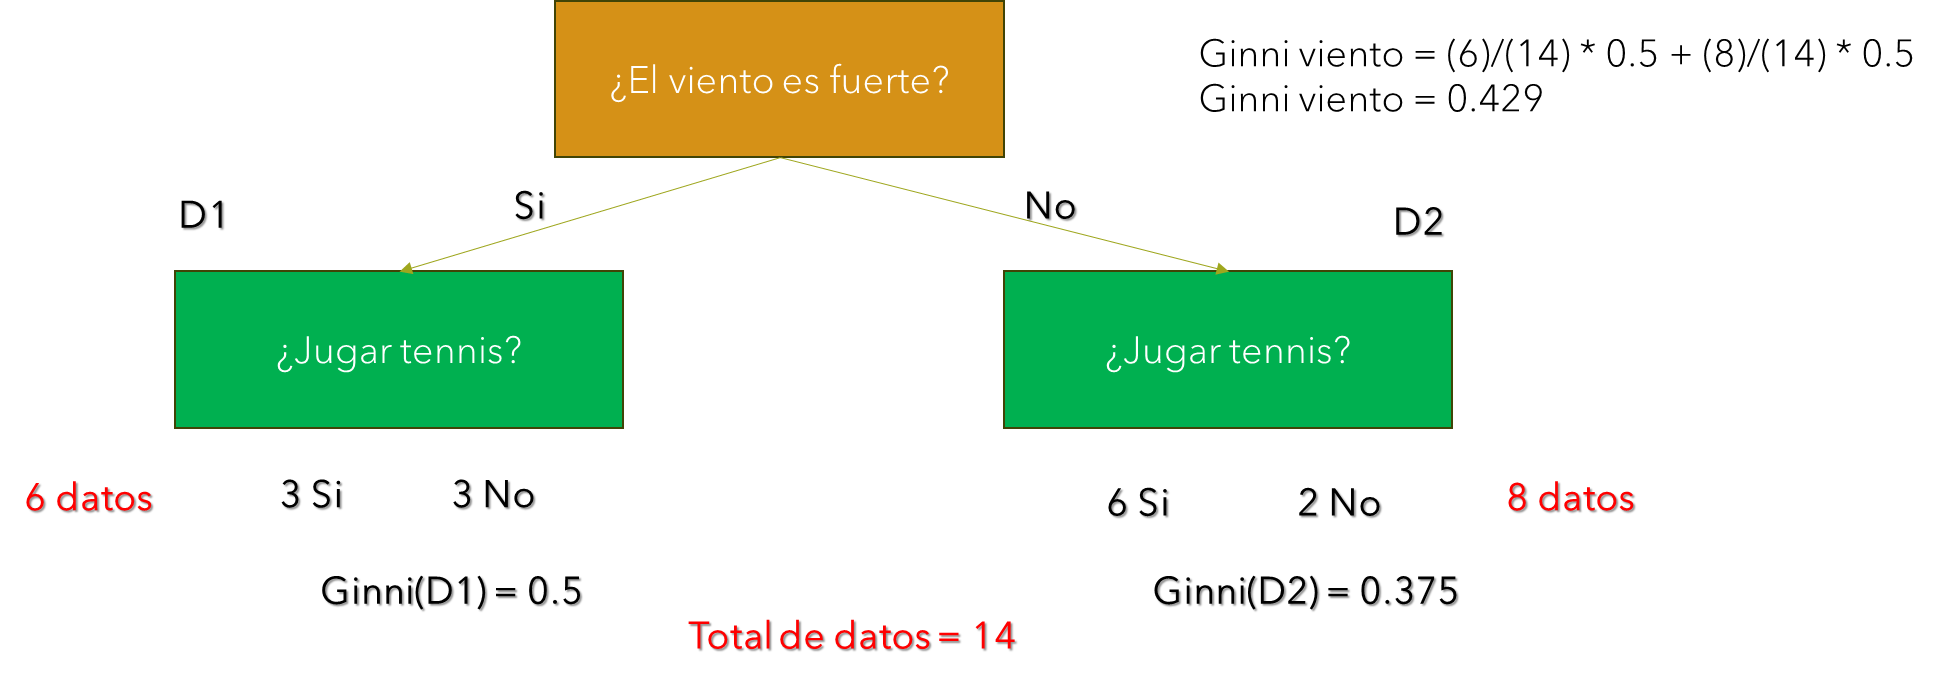

## Crear función para el índice Ginni

In [18]:
def IndiceGinni(Datos, Caracteristicas, NumCar, Etiquetas):
    Ginni=[] #Lista para almacenar los indices Ginni
    Car = [] #Lista las caractrísticas evaluadas
    NomCarL = [] #Lista los nombres de las características
    for i in range(NumCar):
        NomCar = np.unique(Datos[Caracteristicas[i]]) #Extrae los nombres o descripciones de cada característica
        LenNomCar = len(NomCar) #Cantidad de descripciones por característica
        for j in range(LenNomCar):
            Filtro = Datos.loc[Datos[Caracteristicas[i]]==NomCar[j], [Etiquetas]]
            _, FiltroVeces = np.unique(Filtro,return_counts=True)
            if len(FiltroVeces)<2:
                p2 = (FiltroVeces[0]/FiltroVeces.sum())**2
                GinniHoja = 1 - ( p2 )
                Car.append(Caracteristicas[i])
                NomCarL.append(NomCar[j])
                Ginni.append(GinniHoja)
            else:
                p2 = (FiltroVeces[0]/FiltroVeces.sum())**2
                q2 = (FiltroVeces[1]/FiltroVeces.sum())**2
                GinniHoja = 1 - ( p2 + q2)
                Car.append(Caracteristicas[i])
                NomCarL.append(NomCar[j])
                Ginni.append(GinniHoja)
    matriz = np.array([Car,NomCarL,Ginni])
    return np.transpose(matriz)
    

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   panorama      14 non-null     object
 1   temperatura   14 non-null     object
 2   humedad       14 non-null     object
 3   viento        14 non-null     object
 4   jugar tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [20]:
GinniHojas = IndiceGinni(data, ["panorama","temperatura","humedad","viento"], 4, "jugar tennis")

In [21]:
GinniHojas = pd.DataFrame(GinniHojas,columns=["Etiqueta","Descripción","Ginni"])
GinniHojas

,Etiqueta,Descripción,Ginni
0,panorama,lluvioso,0.48
1,panorama,nublado,0.0
2,panorama,soleado,0.48
3,temperatura,alta,0.5
4,temperatura,fria,0.375
5,temperatura,media,0.4444444444444444
6,humedad,alta,0.48979591836734704
7,humedad,normal,0.24489795918367352
8,viento,debil,0.375
9,viento,fuerte,0.5


In [22]:
D = len(data) #Cantidad de datos
PanD1 = len(data.loc[data["panorama"]== "lluvioso", ["jugar tennis"]])
PanD2 = len(data.loc[data["panorama"]== "nublado", ["jugar tennis"]])
PanD3 = len(data.loc[data["panorama"]== "soleado", ["jugar tennis"]])
TemD1 = len(data.loc[data["temperatura"]== "alta", ["jugar tennis"]])
TemD2 = len(data.loc[data["temperatura"]== "fria",])
TemD3 = len(data.loc[data["temperatura"]== "media", ["jugar tennis"]])
HumD1 = len(data.loc[data["humedad"]== "alta", ["jugar tennis"]])
HumD2 = len(data.loc[data["humedad"]== "normal", ["jugar tennis"]])
VieD1 = len(data.loc[data["viento"]== "debil", ["jugar tennis"]])
VieD2 = len(data.loc[data["viento"]== "fuerte", ["jugar tennis"]])

In [23]:
#Ginni para panorama
(PanD1/D)*0.48 + (PanD2/D)*0 + (PanD3/D)* 0.48


0.34285714285714286

In [24]:
#Ginni para temperatura
(TemD1/D)*0.5 + (TemD2/D)*0.375 + (TemD3/D)* 0.44

0.43857142857142856

In [25]:
#Ginni para humedad
(HumD1/D)*0.489 + (HumD2/D)*0.245

0.367

In [26]:
#Ginni para vientos
(VieD1/D)*0.375 + (VieD2/D)*0.5

0.42857142857142855

In [27]:
#La temperatura presenta el índice más alto por ende representa la división más óptima en el nodo raíz

# Vamos a realizar nuestro árbol de decisiones con SciKit Learn

Debido a que nuestros datos están en tipo texto vamos a covertirlos en numero

In [28]:
y = []
for i in range(len(data)):
    if data.iloc[i, 4]=="si":
        y.append(0)
    else:
        y.append(1)
y

[1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [29]:
y = np.array(y)
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [30]:
y.shape

(14,)

In [31]:
x1 = [] #panorama
for i in range(len(data)):
    if data.iloc[i, 0]=="lluvioso":
        x1.append(0)
    elif data.iloc[i, 0]=="nublado":
        x1.append(1)
    else:
        x1.append(2)
x1

[2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0]

In [32]:
x2 = [] #temperatura
for i in range(len(data)):
    if data.iloc[i, 1]=="alta":
        x2.append(0)
    elif data.iloc[i, 1]=="fria":
        x2.append(1)
    else:
        x2.append(2)
x2

[0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2]

In [33]:
x3 = [] #humedad
for i in range(len(data)):
    if data.iloc[i, 2]=="alta":
        x3.append(0)
    else:
        x3.append(1)
x3

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

In [34]:
x4 = [] #viento
for i in range(len(data)):
    if data.iloc[i, 3]=="debil":
        x4.append(0)
    else:
        x4.append(1)
x4

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]

In [35]:
X = np.array([x1,x2,x3,x4])

In [36]:
X = np.transpose(X)
X

array([[2, 0, 0, 0],
       [2, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 2, 0, 0],
       [2, 1, 1, 0],
       [0, 2, 1, 1],
       [2, 2, 1, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 0],
       [0, 2, 0, 1]])

In [37]:
X.shape

(14, 4)

In [38]:
X_names = ["panorama","temperatura","humedad","viento"]

In [39]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
#Profundidad del árbol entrenado
model.get_depth()

3

In [42]:
#Exactitud del modelo
model.score(X_test, y_test)

0.6

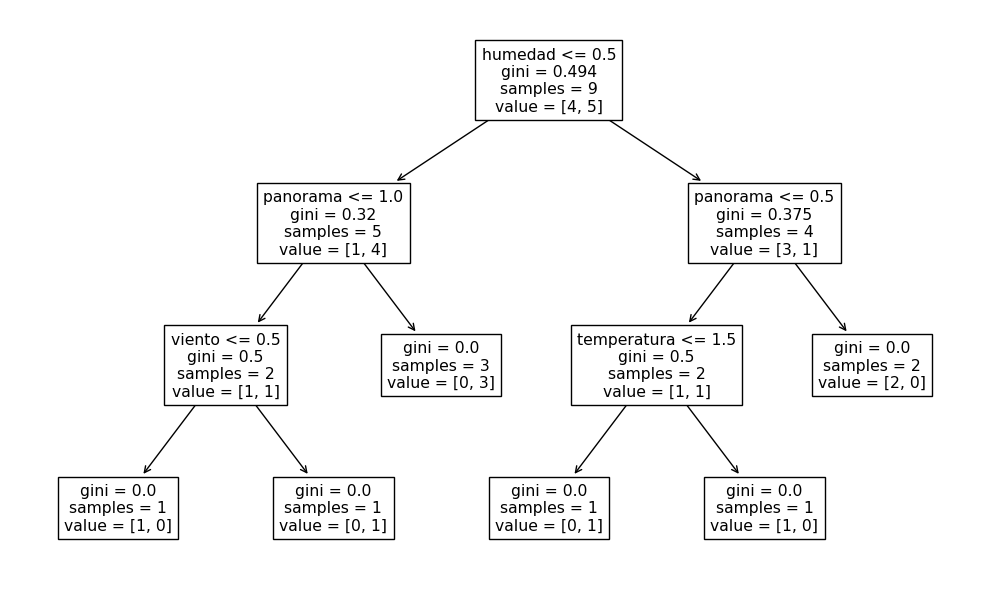

In [43]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
plot_tree(model, feature_names=X_names, ax=ax);

### Modifiquemos la profundidad del arbol

Exactitud: 1.0000


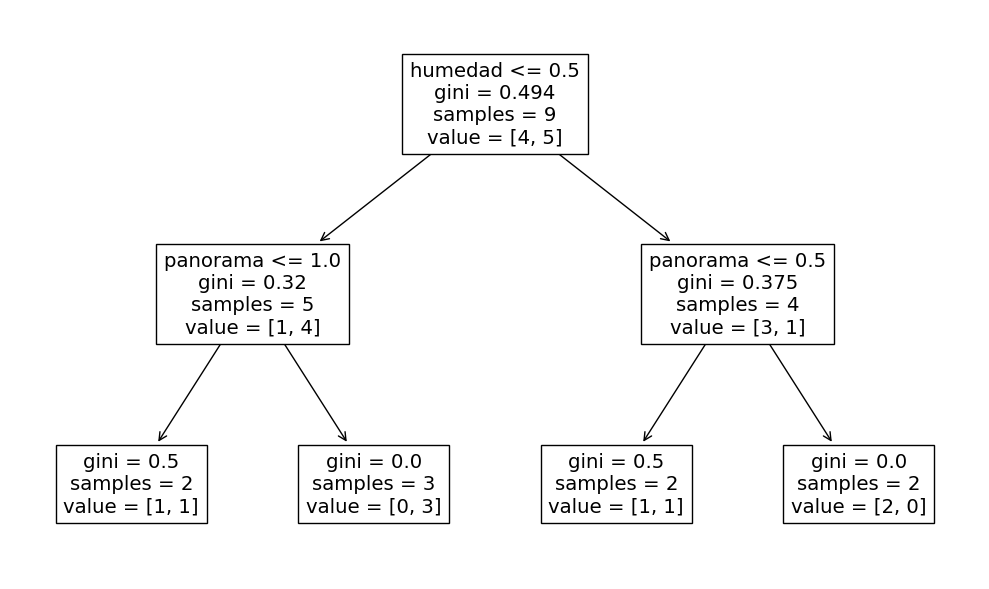

In [44]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
print(f"Exactitud: {model.score(X_test, y_test):0.4f}")

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
plot_tree(model, feature_names=X_names, ax=ax);

### Modifiquemos el número mínimo de muestras necesarias para dividir un nodo interno

Exactitud: 0.6000


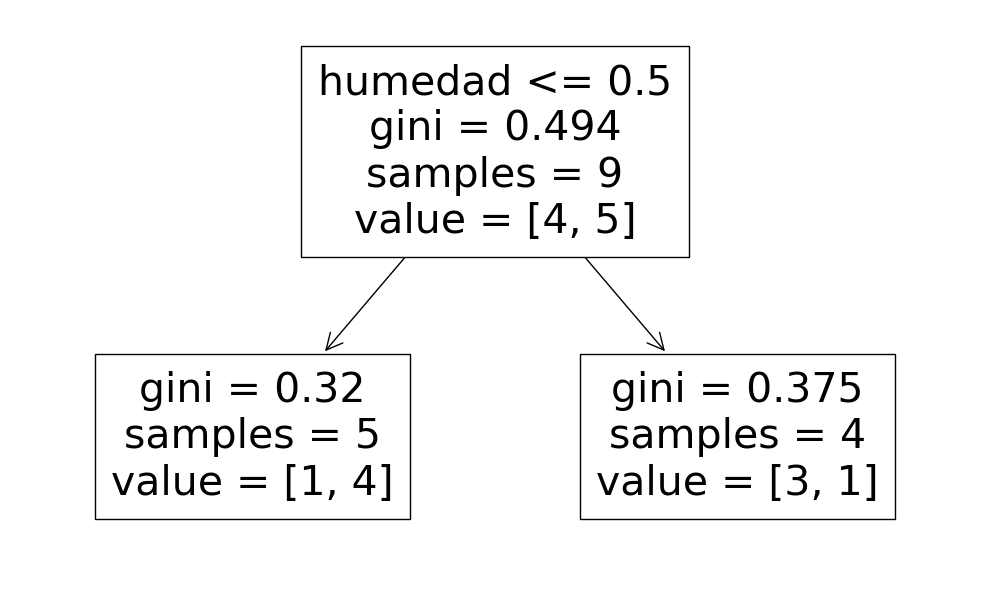

In [45]:
model = DecisionTreeClassifier(min_samples_leaf=3)
model.fit(X_train, y_train)
print(f"Exactitud: {model.score(X_test, y_test):0.4f}")

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
plot_tree(model, feature_names=X_names, ax=ax);

In [46]:
# Forzar una profundidad tiende a producir árboles simétricos. 
# Los árboles restringidos pueden ser resultar en cambio asímetricos

### Empleemos la validación cruzada

In [48]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 
          'max_depth': [1, 2, 3, 4, 5, 10, 20, None],
          'min_samples_leaf': [1, 2, 5, 10, 20],
          }

model = DecisionTreeClassifier()
validator = GridSearchCV(model, params, cv=3, refit=True)
validator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5, 10, 20]})

In [49]:
# Los mejores modelos de acuerdo a la validación cruzada son:
columns = ["param_criterion", "param_max_depth", "param_min_samples_leaf",
           "mean_test_score", "std_test_score", "rank_test_score"]
pd.DataFrame(validator.cv_results_)[columns].sort_values(by="rank_test_score").head(5)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
16,entropy,4,2,0.555556,0.314270,1
21,entropy,5,2,0.444444,0.157135,2
60,gini,5,1,0.444444,0.157135,2
61,gini,5,2,0.444444,0.157135,2
56,gini,4,2,0.444444,0.157135,2


In [50]:
#El mejor árbol de decisión para este problema es:
validator.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}

In [51]:
#El resultado del mejor árbol en el conjunto de prueba en términos de f1-score por clase es:
from sklearn.metrics import classification_report

print(classification_report(y_test, validator.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



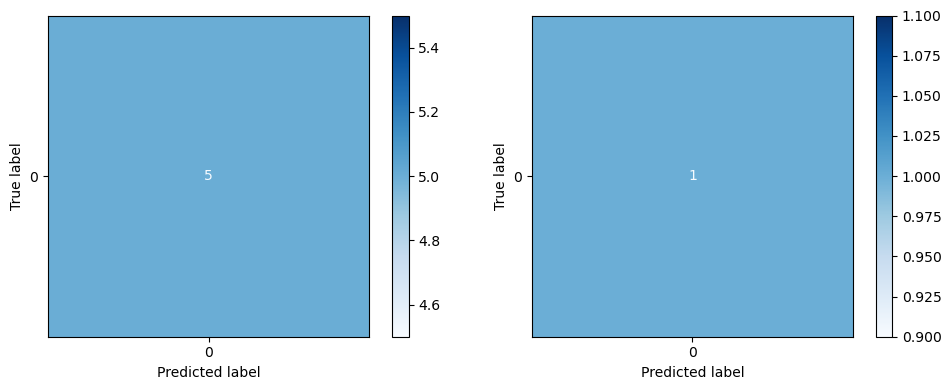

In [52]:
#Grafiquemos la matriz de connfusión
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

ConfusionMatrixDisplay.from_predictions(y_test, validator.predict(X_test), normalize=None,
                                        ax=ax[0], cmap='Blues', colorbar=True);

ConfusionMatrixDisplay.from_predictions(y_test, validator.predict(X_test), normalize='true',
                                        ax=ax[1], cmap='Blues', colorbar=True);

In [53]:
# Por ultimo miremos la predicción

y_pred = validator.predict(X_test)

In [54]:
print(f"Las predicciones son: {y_pred}")

Las predicciones son: [0 0 0 0 0]


# Miremos los árboles con un conjunto de datos de prueba

In [55]:
from sklearn.datasets import load_iris


# Cargar el conjunto de datos Iris
iris = load_iris()

In [56]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [57]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [61]:
# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=0)

In [62]:
# Entrenar el clasificador en los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [63]:
# Evaluar el rendimiento del clasificador en los datos de prueba
score = clf.score(X_test, y_test)

In [64]:
print(f"El rendimiento del clasificador es {score:.2f}")

El rendimiento del clasificador es 0.97


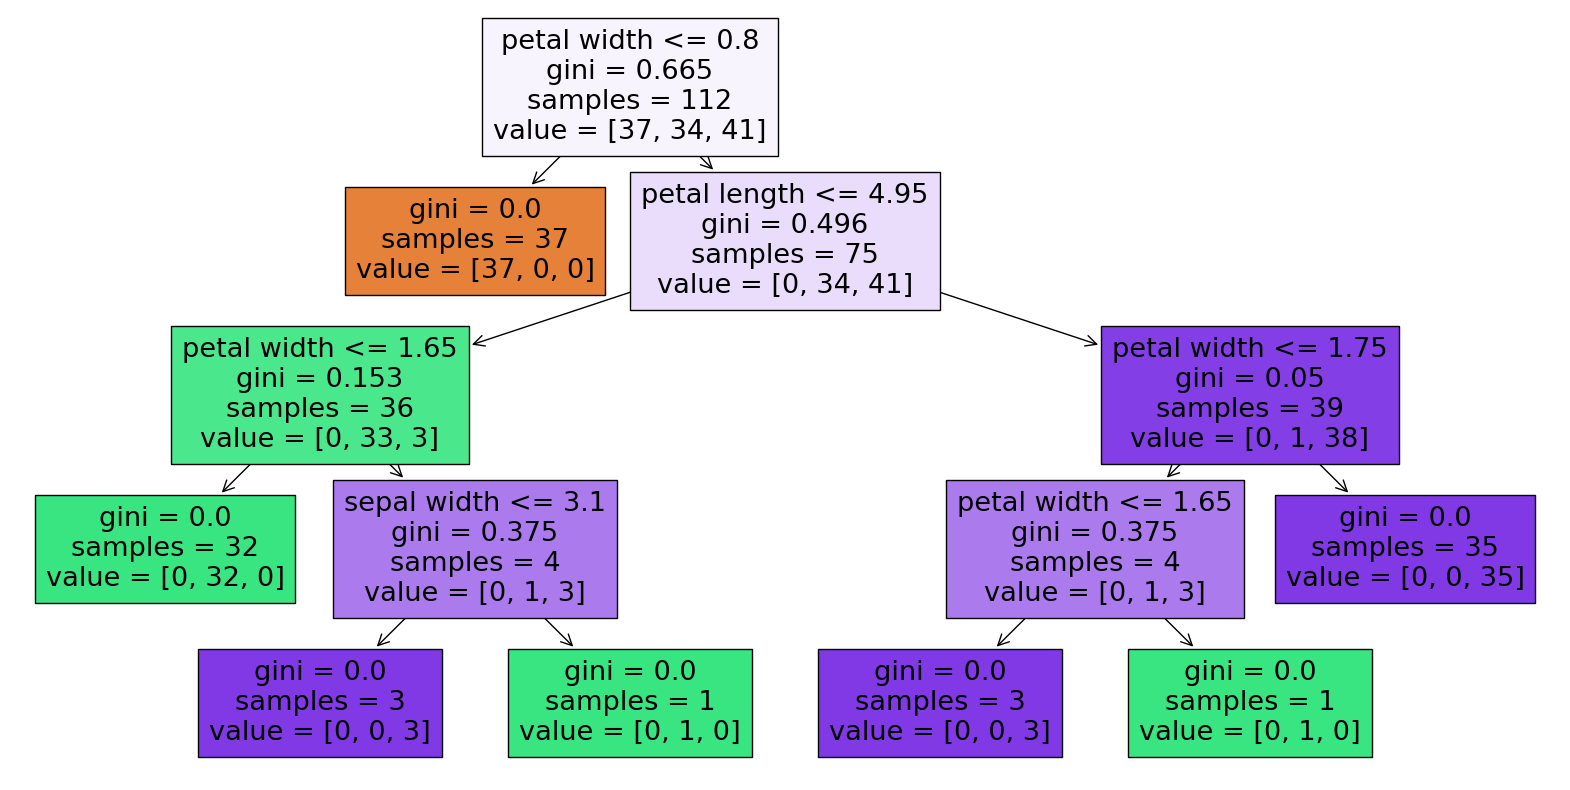

In [65]:
# Visualizar el árbol de clasificación
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True,feature_names=["sepal length","sepal width", "petal length","petal width"])
plt.show()

In [66]:
# Hacer predicciones en los datos de prueba
y_pred = clf.predict(X_test)

In [67]:
# Mostrar las predicciones
print(f"Las predicciones son: {y_pred}")

Las predicciones son: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [68]:
#Comparemos con los datos de evaluación
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

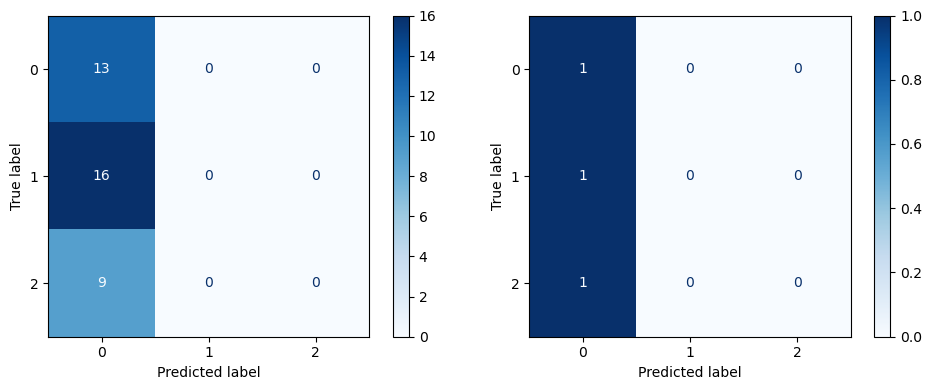

In [69]:
#Grafiquemos la matriz de connfusión

fig, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

ConfusionMatrixDisplay.from_predictions(y_test, validator.predict(X_test), normalize=None,
                                        ax=ax[0], cmap='Blues', colorbar=True);

ConfusionMatrixDisplay.from_predictions(y_test, validator.predict(X_test), normalize='true',
                                        ax=ax[1], cmap='Blues', colorbar=True);